In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
def round(n_round, n_rep):
    """cria range de rounds"""
    list_rodadas = np.linspace(0, n_round, n_round+1, dtype=int)
    r = np.tile(list_rodadas, n_rep)
    return r.tolist()

In [127]:
def plot_confusion_matrix(confusion_matrix, path_save, labels=None):
    """
    Plota uma matriz de confusão 2x2.
    
    Args:
    confusion_matrix (np.ndarray): Matriz de confusão 2x2.
    labels (list): Lista de rótulos para as classes. Exemplo: ['Classe 0', 'Classe 1']
    """
    if labels is None:
        labels = ['Class 0', 'Class 1']
    
    plt.figure(figsize=(5.5, 4))

    sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap=sns.cm.rocket_r, cbar=True,
                xticklabels=labels, yticklabels=labels,  annot_kws={"fontsize": 15})
    
    plt.xlabel('Predicted', fontsize = 15)
    plt.ylabel('Real', fontsize = 15)

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig(path_save, bbox_inches='tight')
    plt.show()

In [128]:
def matrix_confusion_clients(n_malicious, n_malicious_removed, n_removed, n_clients=100):

    p = n_clients-n_malicious
    n = n_malicious


    tn = n_malicious_removed
    fn = n_removed - n_malicious_removed

    fp = n_malicious - n_malicious_removed
    tp = p - fn

    matrix_confusion = np.zeros(shape=(2, 2))
    matrix_confusion[0][0] = tn
    matrix_confusion[0][1] = fn
    matrix_confusion[1][0] = fp
    matrix_confusion[1][1] = tp
    matrix_confusion = matrix_confusion/matrix_confusion.sum()


    return matrix_confusion

def calculate_matrix(path):
    df = pd.read_csv(path)
    matrix = np.zeros((2, 2))
    n = 0
    for r, nc, tp in df[[' removed', ' n_clf', ' tp_removed']].values:
        matrix += matrix_confusion_clients(nc, r, tp)
        n += 1

    matrix = np.abs(matrix/n)
    matrix = matrix / np.sum(matrix, axis = 0)
    aux = matrix[0][1]
    matrix[0][1] = matrix[1][0]
    matrix[1][0] = aux
    return matrix

In [129]:
def rate_rejected_std(path):
    df = pd.read_csv(path)

    df['rr'] = df[' tp_removed'] - df[' removed']
    
    return df['rr'].std()

In [130]:
def loss_model(path, n_round, n_rep):
    """calcula a média e o desvio padrão para cada rodada"""
    lista_erro = []

    rodadas = round(n_round, n_rep)

    df = pd.read_csv(path, sep=",")
    df["rounds"] = rodadas
    
    for i in range(0, n_round):
        re = df.loc[df['rounds']==i]
        re = re[['loss']]
        re[re == ' nan'] = np.inf
        re = re['loss'].loc[re['loss'] != 0]
        re = pd.to_numeric(re)
        re = re.values
        
        erro = (re.sum()/len(re))
        lista_erro.append(erro)
    lista_erro = np.array(lista_erro)
    
    return lista_erro


In [131]:
def media_frp(path, n_round, n_rep):
    """calcula a média dos frp padrão para cada rodada"""
    lista_fpr = []

    rodadas = round(n_round, n_rep)

    df = pd.read_csv(path, sep=",")
    df["rounds"] = rodadas

    for i in range(0, n_round):
        re = df.loc[df['rounds']==i]
        re = re['fpr'].loc[re['fpr'] != 0]
        re = re.values
        media_fpr = (re.sum()/len(re))

        lista_fpr.append(media_fpr)
    lista_fpr = np.array(lista_fpr)
    return lista_fpr * 100 

In [132]:
def media_frr(path, n_round, n_rep):
    """calcula a média dos frr padrão para cada rodada"""
    lista_frr = []

    rodadas = round(n_round, n_rep)

    df = pd.read_csv(path, sep=",")
    df["rounds"] = rodadas

    for i in range(0, n_round):
        re = df.loc[df['rounds']==i]
        re = re['frr']
        re = re.values
        media_fpr = (re.sum()/len(re))

        lista_frr.append(media_fpr)
    lista_frr = np.array(lista_frr)
    return lista_frr * 100 


In [133]:
def media_desvio_model(path, n_round, n_rep):
    """calcula a média e o desvio padrão para cada rodada"""
    lista_media = []
    lista_desvio = []

    rodadas = round(n_round, n_rep)

    df = pd.read_csv(path, sep=",")
    df["rounds"] = rodadas

    for i in range(0, n_round+1):
        re = df.loc[df['rounds']==i]
        re = re['acuracia'].loc[re['acuracia'] != 0]
        re = re.values
        media = (re.sum()/len(re))
        desvio = (np.std(re))

        lista_media.append(media)
        lista_desvio.append(desvio)
    lista_media = np.array(lista_media)
    lista_desvio = np.array(lista_desvio)
    return lista_media * 100, lista_desvio * 100


# FedALA

In [134]:
path_base = 'results/Cifar10_nclients100_jr0.3_remove0_ratecf1_ncl2_atk_random_srn_(1)FedALA_quarantine0.txt'
base_ala, _ = media_desvio_model(path_base, 100, 10)
loss_base_ala = loss_model(path_base, 100, 10)
frr_base_ala = media_frr(path_base, 100, 10)
frp_base_ala = media_frp(path_base, 100, 10)

## Atraso 1

### Shuffle

In [135]:
path_shuffle_1 = 'results/shuffle/Cifar10_nclients100_jr0.3_remove0_nmalicious25_ncl2_atk_shuffle_srn_(1)FedALA_quarantine0init_1_score_0.txt'
path_shuffle_rmv_1 = 'results/shuffle/Cifar10_nclients100_jr0.3_remove1_nmalicious25_ncl2_atk_shuffle_srn_(1)FedALA_quarantine0init_1_score_1.txt'
path_shuffle_rmv_2 = 'results/shuffle/Cifar10_nclients100_jr0.3_remove1_nmalicious25_ncl2_atk_shuffle_srn_(1)FedALA_quarantine0init_1_score_2.txt'

In [136]:
shuffle_ala_1, _ = media_desvio_model(path_shuffle_1, 100, 10)
shuffle_remov_ala_1, _ = media_desvio_model(path_shuffle_rmv_1, 100, 10)
shuffle_remov_ala_2, _ = media_desvio_model(path_shuffle_rmv_2, 100, 10)

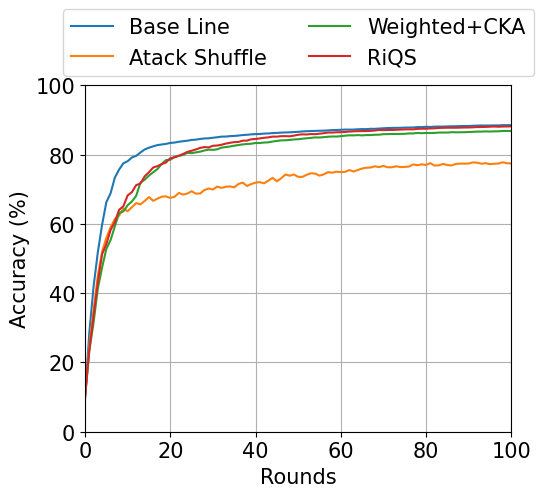

In [137]:
indices = np.linspace(0, 100, 101, dtype=int)

plt.figure(figsize=(5.5, 4.5))

plt.plot(indices, base_ala, label='Base Line')
plt.plot(indices, shuffle_ala_1, label = 'Atack Shuffle')
plt.plot(indices, shuffle_remov_ala_1, label = 'Weighted+CKA')
plt.plot(indices, shuffle_remov_ala_2, label='RiQS')

plt.xlabel('Rounds', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()
plt.legend(loc='upper center', fontsize = 15, bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.grid()

plt.savefig("shuffle_acc.pdf", bbox_inches='tight')
plt.show()

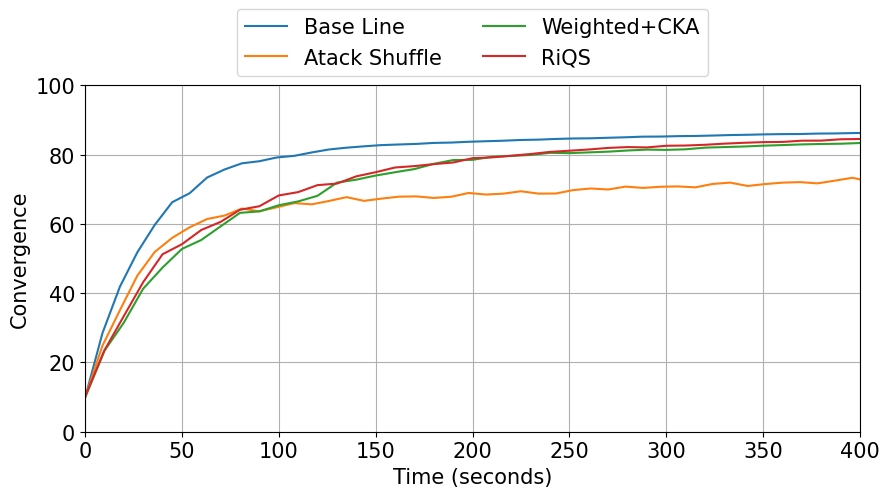

In [182]:
indices = np.linspace(0, 900, 101, dtype=int)
indices2 = np.linspace(0, 900, 91, dtype=int)

plt.figure(figsize=(10, 4.5))

plt.plot(indices, base_ala, label='Base Line')
plt.plot(indices, shuffle_ala_1, label = 'Atack Shuffle')
plt.plot(indices2, shuffle_remov_ala_1[:91], label = 'Weighted+CKA')
plt.plot(indices2, shuffle_remov_ala_2[:91], label='RiQS')

plt.xlabel('Time (seconds)', fontsize=15)
plt.ylabel('Convergence', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 400)
plt.ylim(0, 100)
plt.legend()
plt.legend(loc='upper center', fontsize = 15, bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.grid()

plt.savefig("shuffle_converge.pdf", bbox_inches='tight')
plt.show()

In [139]:
loss_shuffle_ala_1 = loss_model(path_shuffle_1, 100, 10)
loss_shuffle_remov_ala_1 = loss_model(path_shuffle_rmv_1, 100, 10)
loss_shuffle_remov_ala_2 = loss_model(path_shuffle_rmv_2, 100, 10)

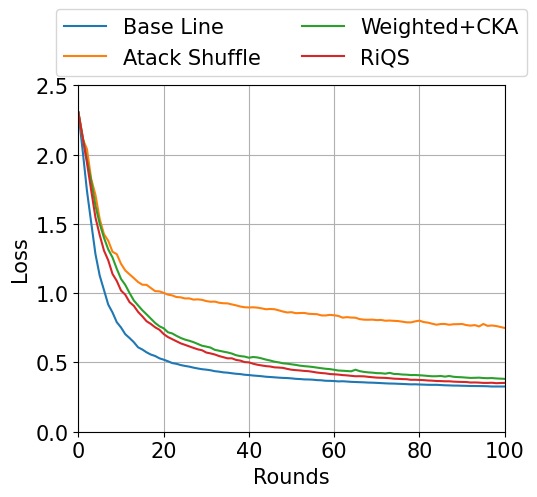

In [140]:
indices = np.linspace(0, 100, 100, dtype=int)

plt.figure(figsize=(5.5, 4.5))

plt.plot(indices, loss_base_ala, label='Base Line')
plt.plot(indices, loss_shuffle_ala_1, label = 'Atack Shuffle')
plt.plot(indices, loss_shuffle_remov_ala_1, label = 'Weighted+CKA')
plt.plot(indices, loss_shuffle_remov_ala_2, label='RiQS')

plt.xlabel('Rounds', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.ylim(0, 2.5)
plt.legend()
plt.legend(loc='upper center', fontsize = 15, bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.grid()

plt.savefig("shuffle_loss.pdf", bbox_inches='tight')
plt.show()

In [141]:
frr_shuffle_ala_1 = media_frr(path_shuffle_1, 100, 10)
frr_shuffle_remov_ala_1 = media_frr(path_shuffle_rmv_1, 100, 10)
frr_shuffle_remov_ala_2 = media_frr(path_shuffle_rmv_2, 100, 10)

In [142]:
frp_shuffle_ala_1 = media_frp(path_shuffle_1, 100, 10)
frp_shuffle_remov_ala_1 = media_frp(path_shuffle_rmv_1, 100, 10)
frp_shuffle_remov_ala_2 = media_frp(path_shuffle_rmv_2, 100, 10)

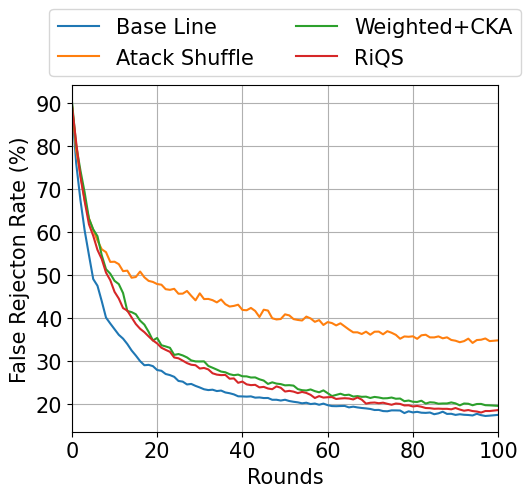

In [143]:
indices = np.linspace(0, 100, 100, dtype=int)

plt.figure(figsize=(5.5, 4.5))

plt.plot(indices, frr_base_ala, label='Base Line')
plt.plot(indices, frr_shuffle_ala_1, label = 'Atack Shuffle')
plt.plot(indices, frr_shuffle_remov_ala_1, label = 'Weighted+CKA')
plt.plot(indices, frr_shuffle_remov_ala_2, label='RiQS')

plt.xlabel('Rounds', fontsize=15)
plt.ylabel('False Rejecton Rate (%)', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
#plt.ylim(0, 100)
plt.legend()
plt.legend(loc='upper center', fontsize = 15, bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.grid()

plt.savefig("shuffle_frr.pdf", bbox_inches='tight')
plt.show()

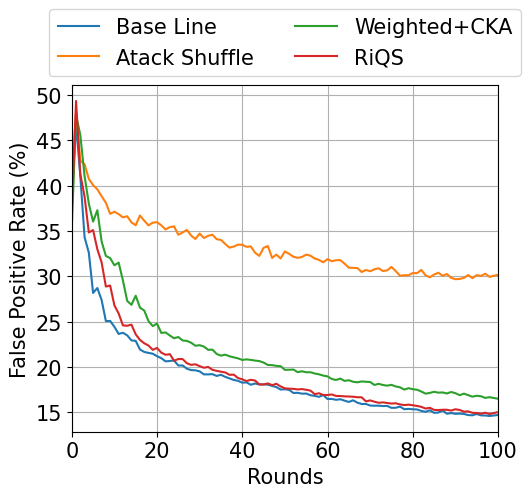

In [144]:
indices = np.linspace(0, 100, 100, dtype=int)

plt.figure(figsize=(5.5, 4.5))

plt.plot(indices, frp_base_ala, label='Base Line')
plt.plot(indices, frp_shuffle_ala_1, label = 'Atack Shuffle')
plt.plot(indices, frp_shuffle_remov_ala_1, label = 'Weighted+CKA')
plt.plot(indices, frp_shuffle_remov_ala_2, label='RiQS')

plt.xlabel('Rounds', fontsize=15)
plt.ylabel('False Positive Rate (%)', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
#plt.ylim(0, 100)
plt.legend()
plt.legend(loc='upper center', fontsize = 15, bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.grid()

plt.savefig("shuffle_frp.pdf", bbox_inches='tight')
plt.show()

In [145]:
matrix_shuffle_1 = calculate_matrix(path_shuffle_rmv_1)
matrix_shuffle_2 = calculate_matrix(path_shuffle_rmv_2)

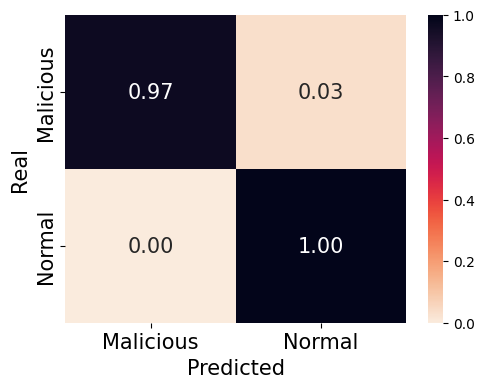

In [146]:
plot_confusion_matrix(matrix_shuffle_1, labels=['Malicious', 'Normal'], 
                      path_save="shuffle_matrix_1.pdf")

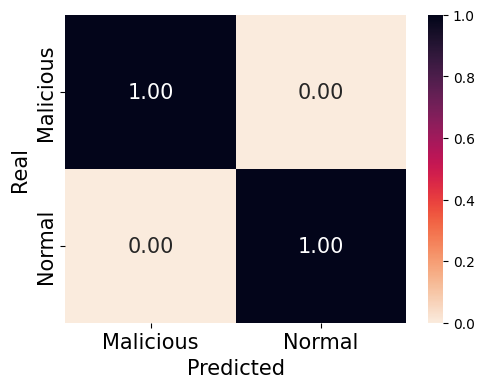

In [147]:
plot_confusion_matrix(matrix_shuffle_2, labels=['Malicious', 'Normal'],
                      path_save="shuffle_matrix_2.pdf")

### Zeros

In [148]:
path_zero_1 = 'results/zero/Cifar10_nclients100_jr0.3_remove0_nmalicious25_ncl2_atk_zero_srn_(1)FedALA_quarantine0init_1_score_0.txt'
path_zero_rmv_1 = 'results/zero/Cifar10_nclients100_jr0.3_remove1_nmalicious25_ncl2_atk_zero_srn_(1)FedALA_quarantine0init_1_score_1.txt'
path_zero_rmv_2 = 'results/zero/Cifar10_nclients100_jr0.3_remove1_nmalicious25_ncl2_atk_zero_srn_(1)FedALA_quarantine0init_1_score_2.txt'

In [149]:
zero_ala_1, _ = media_desvio_model(path_zero_1, 100, 10)
zero_remov_ala_1, _ = media_desvio_model(path_zero_rmv_1, 100, 10)
zero_remov_ala_2, _ = media_desvio_model(path_zero_rmv_2, 100, 10)

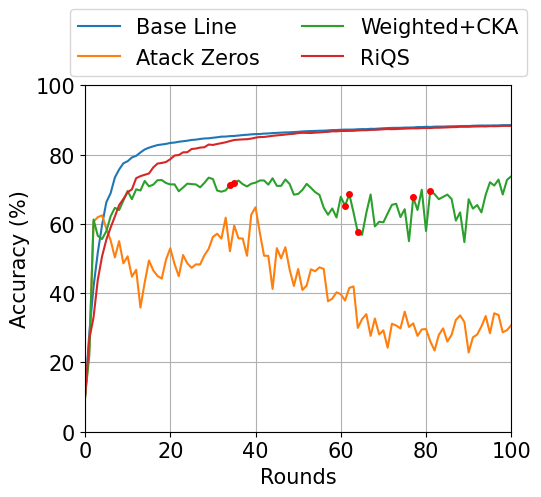

In [150]:
indices = np.linspace(0, 100, 101, dtype=int)

plt.figure(figsize=(5.5, 4.5))

plt.plot(indices, base_ala, label='Base Line')
plt.plot(indices, zero_ala_1, label = 'Atack Zeros')
plt.plot(indices, zero_remov_ala_1, label = 'Weighted+CKA')
plt.plot(indices, zero_remov_ala_2, label='RiQS')

plt.xlabel('Rounds', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)

interru = [81, 77, 62, 61, 34, 35, 64]

for i in interru:
    plt.plot(i, zero_remov_ala_1[i], 'o', markersize=4, color='red')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()
plt.legend(loc='upper center', fontsize = 15, bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.grid()

plt.savefig("zero_acc.pdf", bbox_inches='tight')
plt.show()

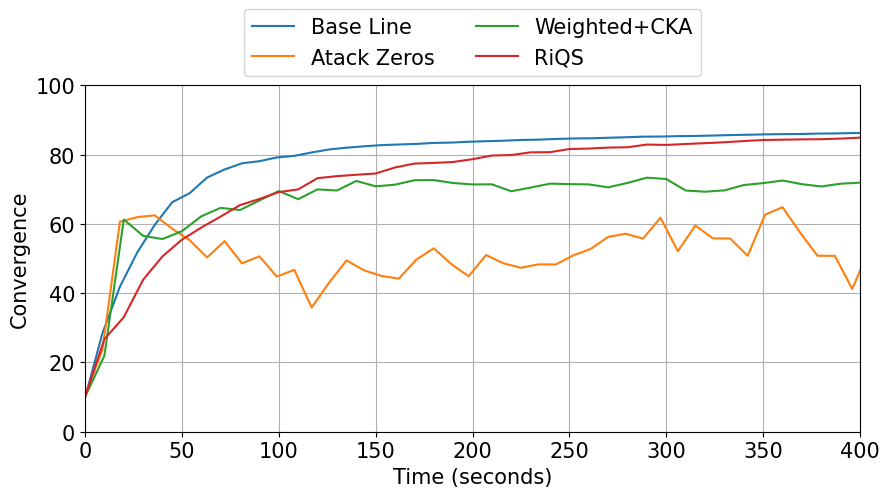

In [181]:
indices = np.linspace(0, 900, 101, dtype=int)
indices2 = np.linspace(0, 900, 91, dtype=int)

plt.figure(figsize=(10, 4.5))

plt.plot(indices, base_ala, label='Base Line')
plt.plot(indices, zero_ala_1, label = 'Atack Zeros')
plt.plot(indices2, zero_remov_ala_1[:91], label = 'Weighted+CKA')
plt.plot(indices2, zero_remov_ala_2[:91], label='RiQS')

plt.xlabel('Time (seconds)', fontsize=15)
plt.ylabel('Convergence', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 400)
plt.ylim(0, 100)
plt.legend()
plt.legend(loc='upper center', fontsize = 15, bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.grid()

plt.savefig("zero_converge.pdf", bbox_inches='tight')
plt.show()

In [152]:
loss_zero_ala_1 = loss_model(path_zero_1, 100, 10)
loss_zero_remov_ala_1 = loss_model(path_zero_rmv_1, 100, 10)
loss_zero_remov_ala_2 = loss_model(path_zero_rmv_2, 100, 10)

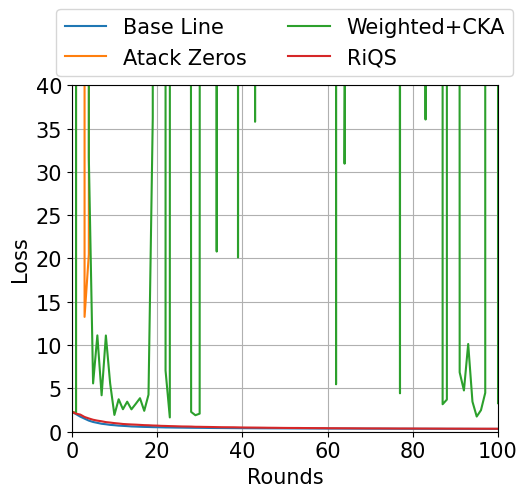

In [153]:
indices = np.linspace(0, 100, 100, dtype=int)

plt.figure(figsize=(5.5, 4.5))

plt.plot(indices, loss_base_ala, label='Base Line')
plt.plot(indices, loss_zero_ala_1, label = 'Atack Zeros')
plt.plot(indices, loss_zero_remov_ala_1, label = 'Weighted+CKA')
plt.plot(indices, loss_zero_remov_ala_2, label='RiQS')

plt.xlabel('Rounds', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.ylim(0, 40)
plt.legend()
plt.legend(loc='upper center', fontsize = 15, bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.grid()

plt.savefig("zero_loss.pdf", bbox_inches='tight')
plt.show()

In [154]:
frr_zero_ala_1 = media_frr(path_zero_1, 100, 10)
frr_zero_remov_ala_1 = media_frr(path_zero_rmv_1, 100, 10)
frr_zero_remov_ala_2 = media_frr(path_zero_rmv_2, 100, 10)

In [155]:
frp_zero_ala_1 = media_frp(path_zero_1, 100, 10)
frp_zero_remov_ala_1 = media_frp(path_zero_rmv_1, 100, 10)
frp_zero_remov_ala_2 = media_frp(path_zero_rmv_2, 100, 10)

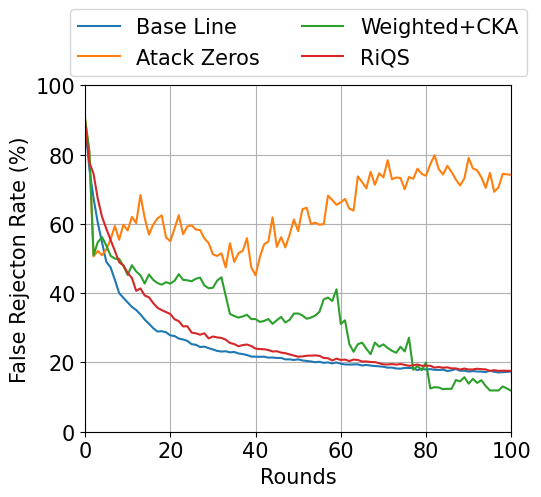

In [156]:
indices = np.linspace(0, 100, 100, dtype=int)

plt.figure(figsize=(5.5, 4.5))

plt.plot(indices, frr_base_ala, label='Base Line')
plt.plot(indices, frr_zero_ala_1, label = 'Atack Zeros')
plt.plot(indices, frr_zero_remov_ala_1, label = 'Weighted+CKA')
plt.plot(indices, frr_zero_remov_ala_2, label='RiQS')

plt.xlabel('Rounds', fontsize=15)
plt.ylabel('False Rejecton Rate (%)', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()
plt.legend(loc='upper center', fontsize = 15, bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.grid()

plt.savefig("zero_frr.pdf", bbox_inches='tight')
plt.show()

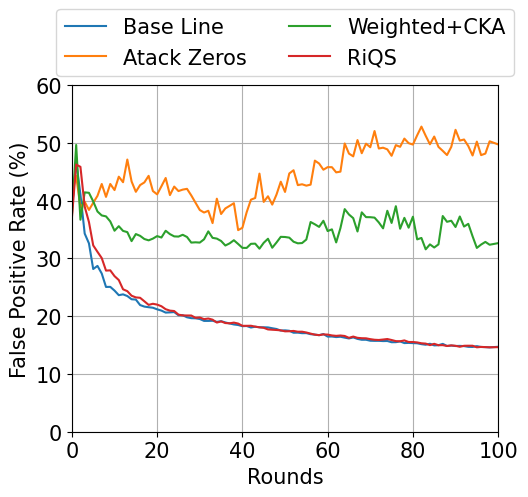

In [157]:
indices = np.linspace(0, 100, 100, dtype=int)

plt.figure(figsize=(5.5, 4.5))

plt.plot(indices, frp_base_ala, label='Base Line')
plt.plot(indices, frp_zero_ala_1, label = 'Atack Zeros')
plt.plot(indices, frp_zero_remov_ala_1, label = 'Weighted+CKA')
plt.plot(indices, frp_zero_remov_ala_2, label='RiQS')

plt.xlabel('Rounds', fontsize=15)
plt.ylabel('False Positive Rate (%)', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.ylim(0,60)
plt.legend()
plt.legend(loc='upper center', fontsize = 15, bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.grid()

plt.savefig("zero_frp.pdf", bbox_inches='tight')
plt.show()

In [158]:
matrix_zero_1 = calculate_matrix(path_zero_rmv_1)
matrix_zero_2 = calculate_matrix(path_zero_rmv_2)

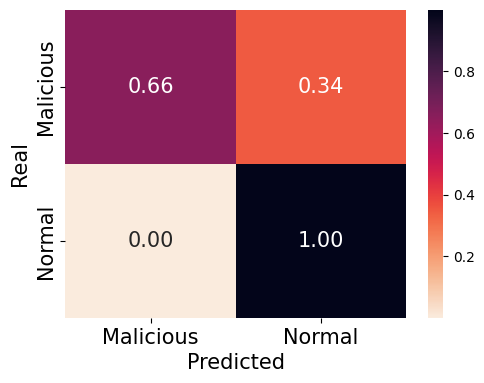

In [159]:
plot_confusion_matrix(matrix_zero_1, labels=['Malicious', 'Normal'],
                      path_save="zero_matrix_1.pdf")

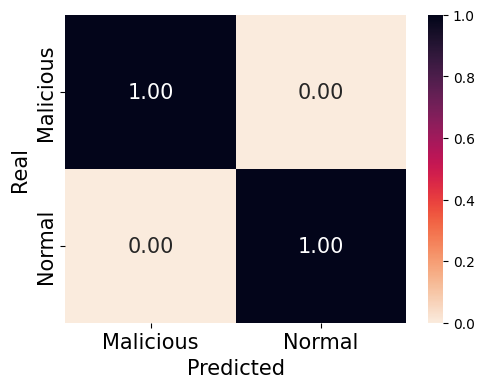

In [160]:
plot_confusion_matrix(matrix_zero_2, labels=['Malicious', 'Normal'],
                      path_save="zero_matrix_2.pdf")

### Random


In [161]:
path_random_1 = 'results/random/Cifar10_nclients100_jr0.3_remove0_nmalicious25_ncl2_atk_random_srn_(1)FedALA_quarantine0init_1_score_0.txt'
path_random_rmv_1 = 'results/random/Cifar10_nclients100_jr0.3_remove1_nmalicious25_ncl2_atk_random_srn_(1)FedALA_quarantine0init_1_score_1.txt'
path_random_rmv_2 = 'results/random/Cifar10_nclients100_jr0.3_remove1_nmalicious25_ncl2_atk_random_srn_(1)FedALA_quarantine0init_1_score_2.txt'

In [162]:
random_ala_1, _ = media_desvio_model(path_random_1, 100, 10)
random_remov_ala_1, _ = media_desvio_model(path_random_rmv_1, 100, 9)
random_remov_ala_2, _ = media_desvio_model(path_random_rmv_2, 100, 10)

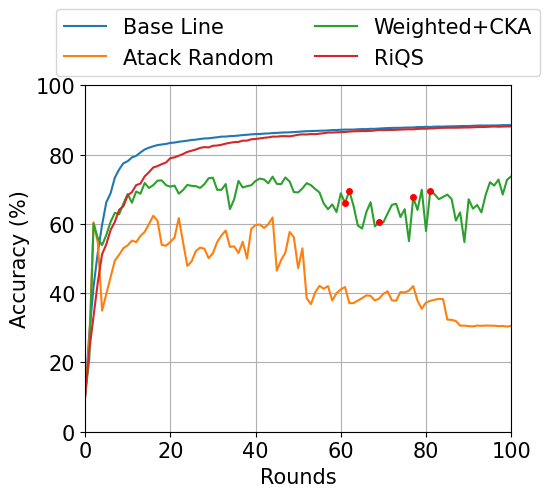

In [163]:
indices = np.linspace(0, 100, 101, dtype=int)

plt.figure(figsize=(5.5, 4.5))

plt.plot(indices, base_ala, label='Base Line')
plt.plot(indices, random_ala_1, label = 'Atack Random')
plt.plot(indices, random_remov_ala_1, label = 'Weighted+CKA')
plt.plot(indices, random_remov_ala_2, label='RiQS')

interru = [81, 77, 62, 61, 69]

for i in interru:
    plt.plot(i, random_remov_ala_1[i], 'o', markersize=4, color='red')

plt.xlabel('Rounds', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()
plt.legend(loc='upper center', fontsize = 15, bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.grid()

plt.savefig("random_acc.pdf", bbox_inches='tight')
plt.show()

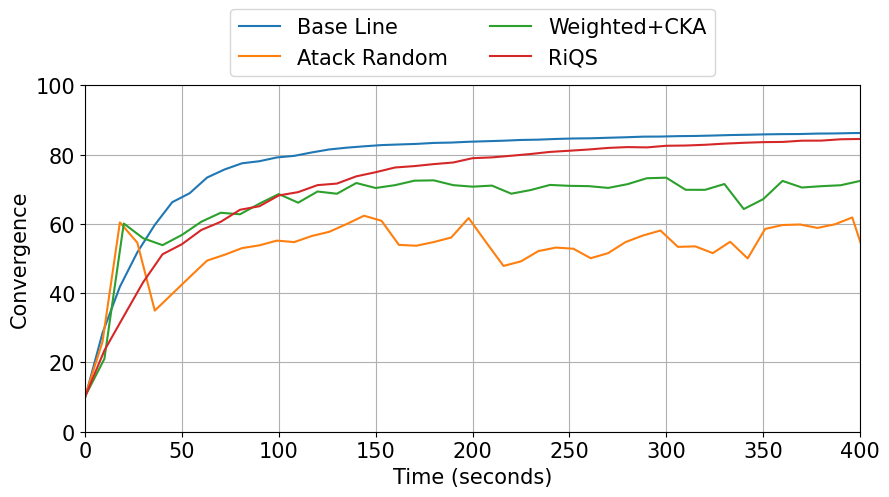

In [180]:
indices = np.linspace(0, 900, 101, dtype=int)
indices2 = np.linspace(0, 900, 91, dtype=int)

plt.figure(figsize=(10, 4.5))

plt.plot(indices, base_ala, label='Base Line')
plt.plot(indices, random_ala_1, label = 'Atack Random')
plt.plot(indices2, random_remov_ala_1[:91], label = 'Weighted+CKA')
plt.plot(indices2, random_remov_ala_2[:91], label='RiQS')

plt.xlabel('Time (seconds)', fontsize=15)
plt.ylabel('Convergence', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 400)
plt.ylim(0, 100)
plt.legend()
plt.legend(loc='upper center', fontsize = 15, bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.grid()

plt.savefig("random_converge.pdf", bbox_inches='tight')
plt.show()

In [165]:
loss_random_ala_1 = loss_model(path_random_1, 100, 10)
loss_random_remov_ala_1 = loss_model(path_random_rmv_1, 100, 9)
loss_random_remov_ala_2 = loss_model(path_random_rmv_2, 100, 10)

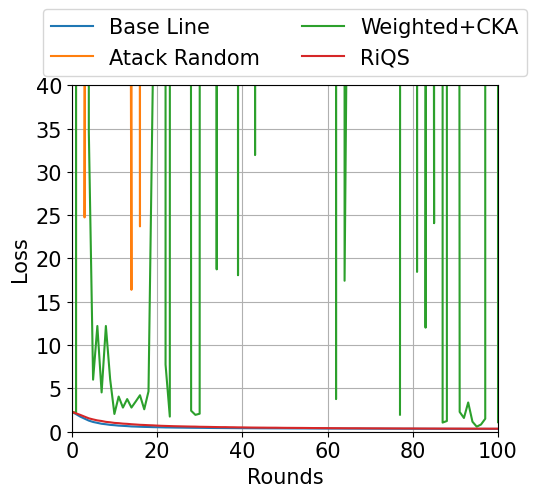

In [166]:
indices = np.linspace(0, 100, 100, dtype=int)

plt.figure(figsize=(5.5, 4.5))

plt.plot(indices, loss_base_ala, label='Base Line')
plt.plot(indices, loss_random_ala_1, label = 'Atack Random')
plt.plot(indices, loss_random_remov_ala_1, label = 'Weighted+CKA')
plt.plot(indices, loss_random_remov_ala_2, label='RiQS')

plt.xlabel('Rounds', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.ylim(0, 40)
plt.legend()
plt.legend(loc='upper center', fontsize = 15, bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.grid()

plt.savefig("random_loss.pdf", bbox_inches='tight')
plt.show()

In [167]:
frr_random_ala_1 = media_frr(path_random_1, 100, 10)
frr_random_remov_ala_1 = media_frr(path_random_rmv_1, 100, 9)
frr_random_remov_ala_2 = media_frr(path_random_rmv_2, 100, 10)

In [168]:
frp_random_ala_1 = media_frp(path_random_1, 100, 10)
frp_random_remov_ala_1 = media_frp(path_random_rmv_1, 100, 9)
frp_random_remov_ala_2 = media_frp(path_random_rmv_2, 100, 10)

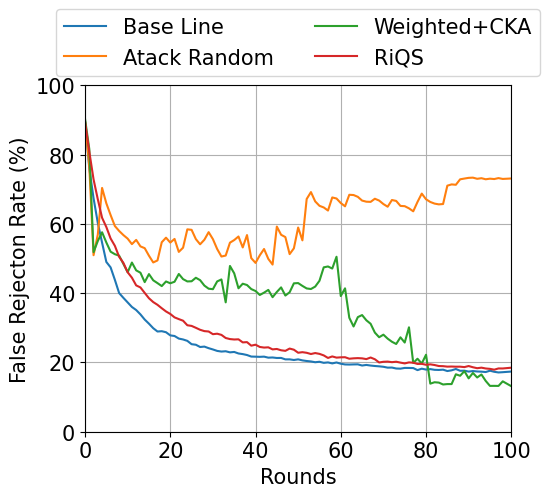

In [169]:
indices = np.linspace(0, 100, 100, dtype=int)

plt.figure(figsize=(5.5, 4.5))

plt.plot(indices, frr_base_ala, label='Base Line')
plt.plot(indices, frr_random_ala_1, label = 'Atack Random')
plt.plot(indices, frr_random_remov_ala_1, label = 'Weighted+CKA')
plt.plot(indices, frr_random_remov_ala_2, label='RiQS')

plt.xlabel('Rounds', fontsize=15)
plt.ylabel('False Rejecton Rate (%)', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()
plt.legend(loc='upper center', fontsize = 15, bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.grid()

plt.savefig("random_frr.pdf", bbox_inches='tight')
plt.show()

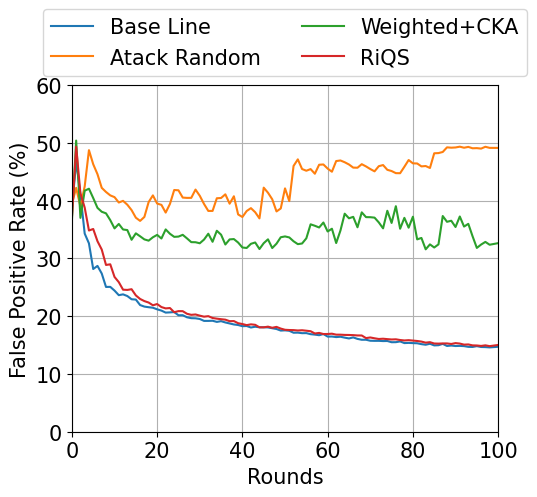

In [170]:
indices = np.linspace(0, 100, 100, dtype=int)

plt.figure(figsize=(5.5, 4.5))

plt.plot(indices, frp_base_ala, label='Base Line')
plt.plot(indices, frp_random_ala_1, label = 'Atack Random')
plt.plot(indices, frp_random_remov_ala_1, label = 'Weighted+CKA')
plt.plot(indices, frp_random_remov_ala_2, label='RiQS')

plt.xlabel('Rounds', fontsize=15)
plt.ylabel('False Positive Rate (%)', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.ylim(0, 60)
plt.legend()
plt.legend(loc='upper center', fontsize = 15, bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.grid()

plt.savefig("random_frp.pdf", bbox_inches='tight')
plt.show()

In [171]:
matrix_random_1 = calculate_matrix(path_random_rmv_1)
matrix_random_2 = calculate_matrix(path_random_rmv_2)

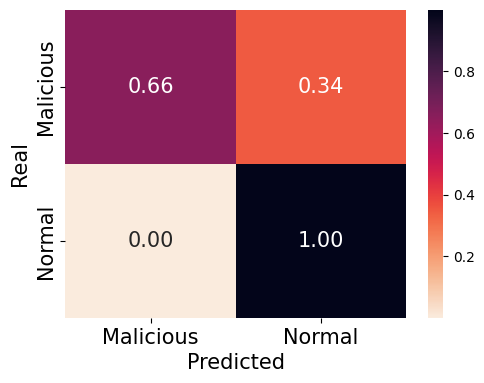

In [172]:
plot_confusion_matrix(matrix_random_1, labels=['Malicious', 'Normal'],
                      path_save="random_matrix_1.pdf")

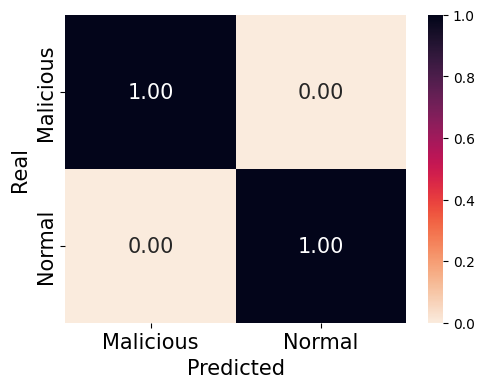

In [173]:
plot_confusion_matrix(matrix_random_2, labels=['Malicious', 'Normal'],
                      path_save="random_matrix_2.pdf")

# FedAVG

## Shuffle atack

In [174]:
shuflle_avg, _ = media_desvio_model('results/shuffle/Cifar10_nclients100_jr0.3_remove0_ratecf1_ncl2_atk_shuffle_srn_(1)FedAvg_quarantine0.txt', 100, 8)
shuffle_remov_avg, _ = media_desvio_model('results/shuffle/Cifar10_nclients100_jr0.3_remove1_ratecf1_ncl2_atk_shuffle_srn_(1)FedAvg_quarantine0.txt', 100, 10)
shuflle_remov_quarantine_avg, _ = media_desvio_model('results/shuffle/Cifar10_nclients100_jr0.3_remove1_ratecf1_ncl2_atk_shuffle_srn_(1)FedAvg_quarantine1.txt', 100, 10)

In [175]:
std_random_rejected_1 = rate_rejected_std(path_random_rmv_1)
std_random_rejected_2 = rate_rejected_std(path_random_rmv_2)

std_shuffle_rejected_1 = rate_rejected_std(path_shuffle_rmv_1)
std_shuffle_rejected_2 = rate_rejected_std(path_shuffle_rmv_2)

std_zero_rejected_1 = rate_rejected_std(path_zero_rmv_1)
std_zero_rejected_2 = rate_rejected_std(path_zero_rmv_2)

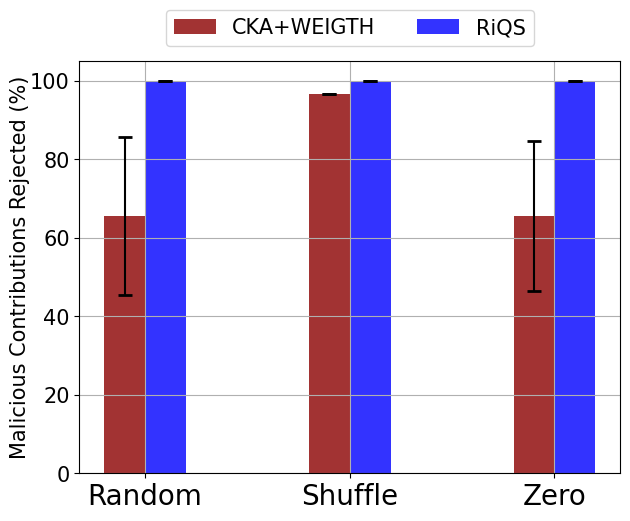

In [176]:
datasets = ['Random', 'Shuffle', 'Zero']
methods = ['CKA+WEIGTH', 'RiQS']


n_groups = len(datasets)
n_methods = len(methods)
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

# Dados de exemplo com apenas 3 barras em cada grupo
values = np.array([
    [matrix_random_1[0][0] * 100, matrix_random_2[0][0] * 100],  # CIFAR-10
    [matrix_shuffle_1[0][0] * 100, matrix_shuffle_2[0][0] * 100],  # FMNIST
    [matrix_zero_1[0][0] * 100, matrix_zero_2[0][0] * 100]    # MNIST
])
errors = np.array([
    [std_random_rejected_1, std_random_rejected_2],    # CIFAR-10
    [std_shuffle_rejected_1, std_shuffle_rejected_1],    # FMNIST
    [std_zero_rejected_1, std_zero_rejected_2]   # MNIST
]) * 100


# Recalculando o número de métodos
n_methods = len(methods)

# Criando as barras para cada método com 3 barras por grupo
fig, ax = plt.subplots()
colors = ['darkred', 'blue'] # Substitua com suas cores preferidas

# Criando as barras para cada método
for i, method in enumerate(methods):
    ax.bar(index + i*bar_width, values[:, i], bar_width, alpha=opacity, color=colors[i],
           yerr=errors[:, i], label=method, error_kw=dict(ecolor='black', lw=1.5, capsize=5, capthick=2))

# Adicionando rótulos, título e configurações ao gráfico
ax.set_ylabel('Malicious Contributions Rejected (%)', fontsize=15,  labelpad=0)
ax.set_xticks(index + bar_width * (n_methods / 2 - 0.5))
ax.set_xticklabels(datasets, fontsize=20)
#ax.set_yticks(np.arange(0, 101, 10))
ax.tick_params(axis='y', labelsize=15)
ax.legend(fontsize=15)

plt.tight_layout()
plt.grid()
plt.legend(loc='upper center', fontsize = 15, bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.savefig("malicous.pdf", bbox_inches='tight', pad_inches=0.5)
plt.show()